In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hongsukyi/Lectures/main/vds/vds.csv')

In [3]:
df.head(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87


In [ ]:
df.tail(3)

In [ ]:
df.describe()

In [ ]:
df.info()

In [4]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

In [ ]:
df['ToVol'].plot()

In [ ]:
df['ToVol'].plot(rot=45)

In [ ]:
df['ToVol'][:288].plot(rot=45)

In [ ]:
df['ToVol'][288:576].plot(rot=45,figsize=(8,6))

In [ ]:
df['Speed'][:288].plot(rot=45,figsize=(8,6))

In [ ]:
df['Speed'][288:576].plot(rot=45,figsize=(8,6))

In [ ]:
df['Occ.Rate'][:288].plot(rot=45,figsize=(8,6))

In [ ]:
df['Occ.Rate'][288:576].plot(rot=45,figsize=(8,6))

### 2개의 클래스로 레이블링

def get_score(speed):
    if speed < 45:
        label = 'Jam'
    else :
        label = 'Normal'
    return label

### 3개의 클래스로 레이블링

In [5]:
num_classes = 3 
class_labels= ['Jam', 'Slow', 'Normal']

In [6]:
def get_score(speed):
    if speed < 30:
        label = 'Jam'
    elif speed < 50:
        label = 'Slow'
    else :
        label = 'Normal'
    return label

In [7]:
df["label_speed"] = df["Speed"].apply(lambda spd: get_score(spd))
df.head()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
Date,,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [8]:
df["label_speed"].unique()

array(['Normal', 'Slow', 'Jam'], dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.scatterplot(data=df, x = 'Date', y = 'Speed', hue='label_speed')

In [ ]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'Speed', hue='label_speed') 

In [ ]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'ToVol', hue='label_speed') 

In [ ]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'Occ.Rate', hue='label_speed') 

In [ ]:
df.hist('ToVol',bins=100)

In [ ]:
sns.pairplot(df, hue='label_speed')

C:\Users\admin\AppData\Local\Temp\ipykernel_7520\3532720767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,  cmap='YlGnBu')


<AxesSubplot: >

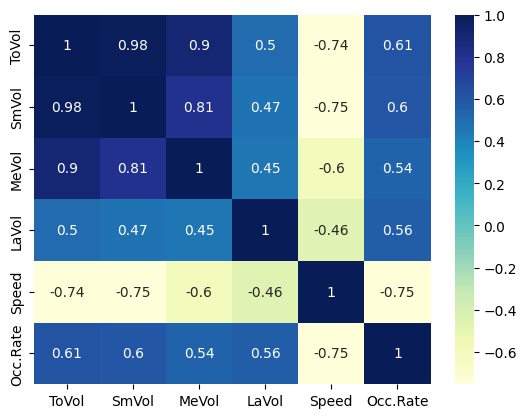

In [10]:
sns.heatmap(df.corr(), annot = True,  cmap='YlGnBu')

In [ ]:
sns.violinplot(x='label_speed',y='ToVol',data=df)

In [ ]:
sns.violinplot(x='label_speed',y='Speed',data=df)

In [ ]:
sns.violinplot(x='label_speed',y='Occ.Rate',data=df)

## 데이터 전처리를 위하여 sklearn을 사용하자

In [ ]:
df.head()

In [11]:
class_dic = {'Jam':0, 'Slow':1, 'Normal':2}
#class_dic = {'Jam':0, 'Normal':1}
df['label_speed'] = df['label_speed'].apply(lambda i : class_dic[i])
df.head(2)

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
Date,,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90,2
2017-04-02 0:05,45,32,13,0,58.9,1.84,2


- Speed는 레이블 만들때 사용해서 feature에서 제외해보자 

In [12]:
features = ['ToVol','LaVol','MeVol','SmVol','Occ.Rate']
X = df[features]
y = df['label_speed']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(6451, 5) (6451,)
(1613, 5) (1613,)


In [ ]:
X_train

In [ ]:
X_test

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

In [16]:
print(X_train.shape)

(6451, 5)


In [ ]:
print(X_train[1].shape)

In [17]:
num_features = len(X_train[1])
print('number of features :', num_features)

number of features : 5


## Deep Neural Network

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Flatten, Dense, Softmax

- binary classification 문제로, 마지막 Dense층에는 'sigmoid'를 사용해야한다.

In [ ]:
num_neurons = 20
def model_mlp_sigmoid():
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=[num_features]),
        Dense(num_classes, activation='sigmoid')
    ])    
    model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 

In [19]:
num_neurons = 20
def model_mlp_softmax():
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=[num_features]),
        Dense(num_classes, activation='softmax')
    ])    
    model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 

In [20]:
print('number of features (Input) : ',num_features)
print('number of classes (Output) : ', num_classes)
print('number of neurons (Hidden) : ', num_neurons)

number of features (Input) :  5
number of classes (Output) :  3
number of neurons (Hidden) :  20


In [21]:
print('(x+b)*w :', (num_features+1)*num_neurons)
print('(neurons+1)*classes:', (num_neurons+1)*num_classes)

(x+b)*w : 120
(neurons+1)*classes: 63


In [22]:
model = model_mlp_softmax()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [23]:
# !pip install livelossplot
from livelossplot import PlotLossesKeras

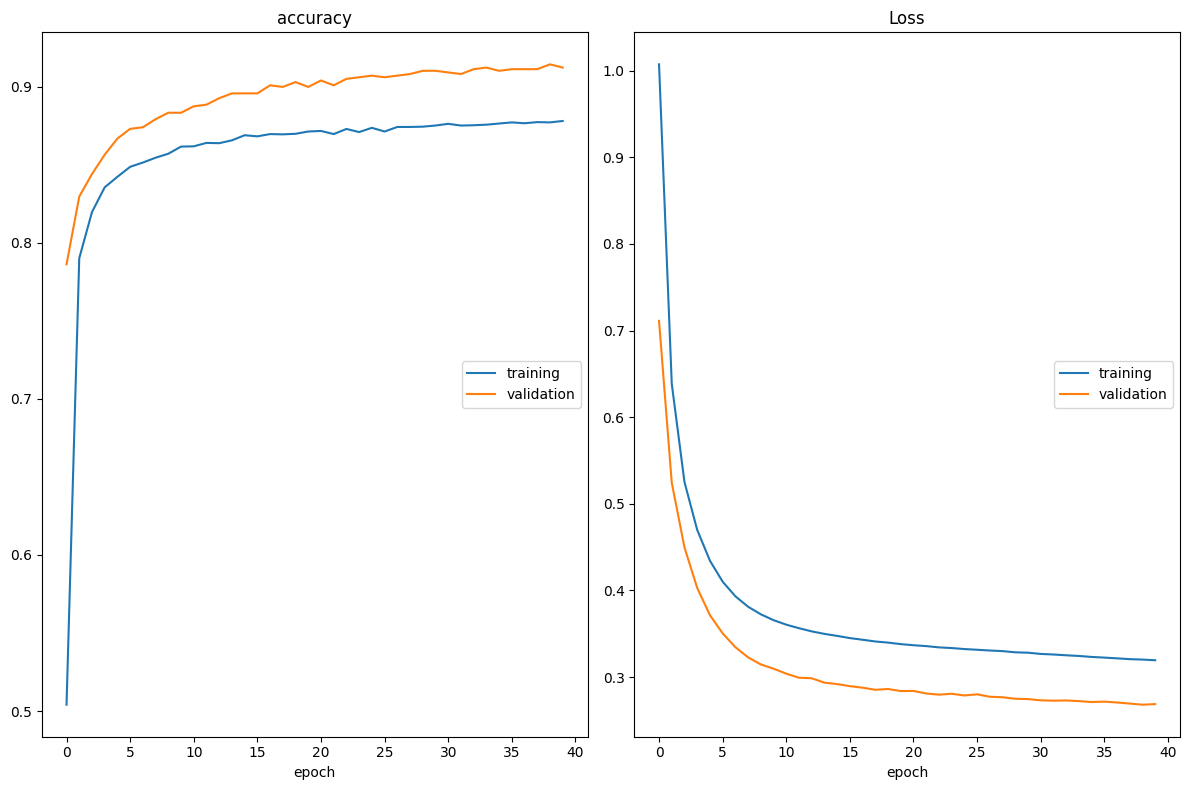

accuracy
	training         	 (min:    0.504, max:    0.878, cur:    0.878)
	validation       	 (min:    0.786, max:    0.914, cur:    0.912)
Loss
	training         	 (min:    0.319, max:    1.007, cur:    0.319)
	validation       	 (min:    0.268, max:    0.711, cur:    0.269)
86/86 [==============================] - 1s 9ms/step - loss: 0.3195 - accuracy: 0.8780 - val_loss: 0.2689 - val_accuracy: 0.9122


In [24]:
history = model.fit(X_train,y_train, epochs=40, 
                    validation_split=0.15,
                    batch_size=64,
                    callbacks=[PlotLossesKeras()])

In [25]:
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8785


[0.32632961869239807, 0.8784872889518738]

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [26]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


<AxesSubplot: >

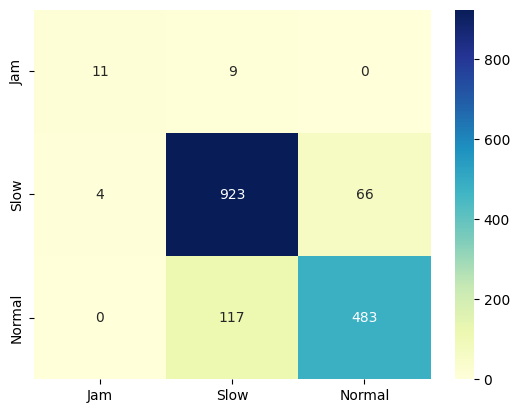

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,  cmap='YlGnBu',
            fmt = 'd',xticklabels = class_labels, yticklabels = class_labels)